In [68]:
import tensorflow as tf
import matplotlib.pylab as plt
import os
import glob
from itertools import chain
from matplotlib import colors
import matplotlib
import numpy as np
import pandas as pd


matplotlib.rc_file('/home/srossi/.config/matplotlib/white_paper')




Bad key "axes.color_cycle" on line 242 in
/home/srossi/.config/matplotlib/white_paper.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [69]:
filename = '../experiments/regr-depth-exp/work/powerplant/blm/run-0001/events.out.tfevents.1536070886.py-notebook0-128-prod'

In [123]:
class ExperimentPlotter():
    def __init__(self, name):
        self.name = name

def parse_tfevents_file(filename: str) -> pd.DataFrame:
    events = []
    for i, event in enumerate(tf.train.summary_iterator(filename)):
        if i == 0:
            continue

        scalar = list(event.summary.value)[0]

        dicti = {'wall_time': event.wall_time, 
                 'step': event.step, 
                 'tag': str(scalar.tag), 
                 'value': scalar.simple_value}
        events.append(dicti)
    return pd.DataFrame(events)


def get_runs_in_dir(path:str):
    return glob.glob('%s/**/events.out.tfevents*' % path, recursive=True)


def get_results_runs(filename_runs):
    frames = []

    for i, filename_run in enumerate(filename_runs):
        df = parse_tfevents_file(filename_run)
        df['run'] = i
        frames.append(df)

    df = pd.concat(frames)
    return df

def plot_tag(df, tag, ax, label):
    

    filtered_df = df[df.tag==tag].groupby('step')

    steps = filtered_df.mean().index.tolist()
    means = filtered_df.mean()['value']
    stds = filtered_df.std()['value']
    
    color = next(ax._get_lines.prop_cycler)['color']
    ax.plot(steps, means, label=label, color=color, alpha=1)
    ax.fill_between(steps, means - stds, means + stds, color=color, alpha=0.5)

    return ax


def plot_methods(methods, basedir, tag, ax):

    for method in methods:

        filename_runs = get_runs_in_dir(basedir + '/%s/' % method)
        df = get_results_runs(filename_runs)
        plot_tag(df, tag, ax, method.upper())


KeyboardInterrupt: 

/home/srossi/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/srossi/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/srossi/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/srossi/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/srossi/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: fin

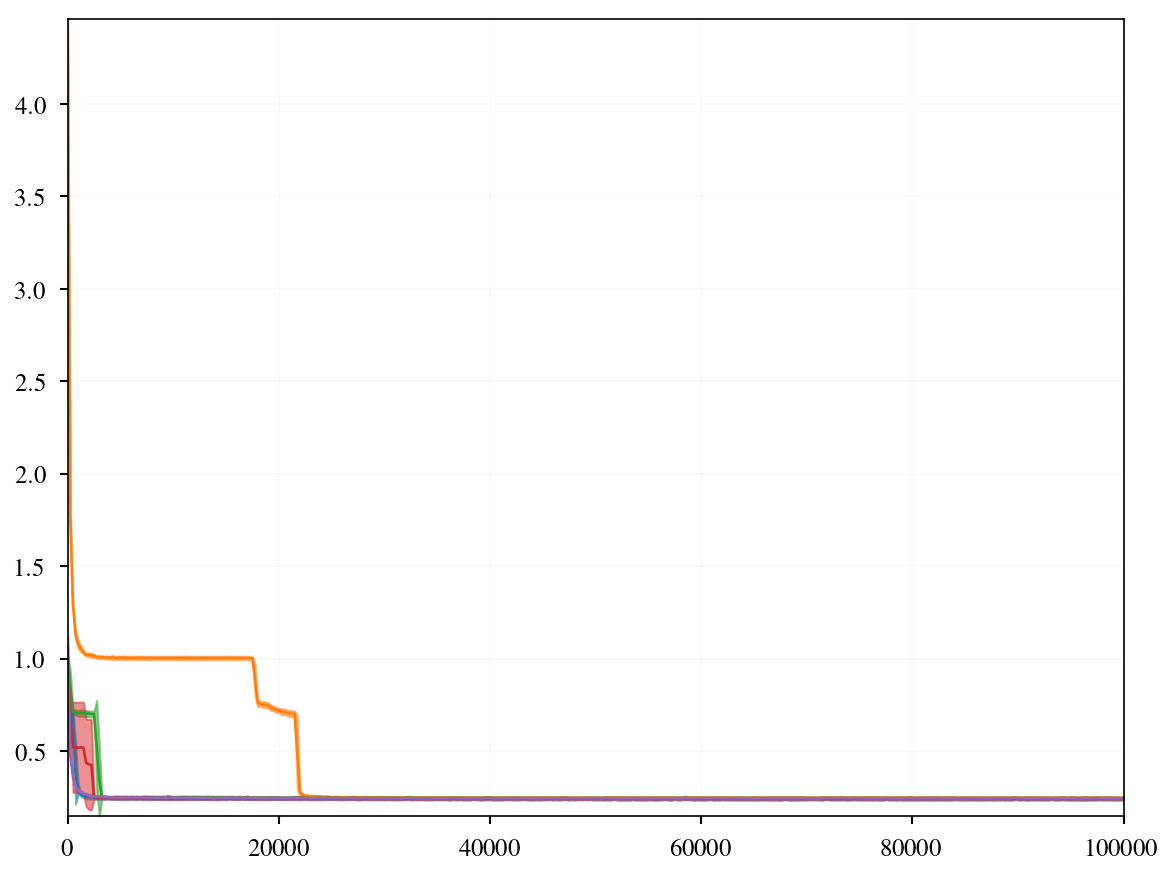

In [126]:
fig, ax = plt.subplots(1, 1)

basedir = '../experiments/regr-depth-exp/work/powerplant'
tag = 'error/test'
methods = ['blm', 'uninformative', 'heuristic', 'xavier-normal', 'orthogonal', 'lsuv']
plot_methods(methods, basedir, tag, ax)

fig.legend()
ax.semilogx()
fig.show()